In [ ]:
%pip install -U datasets
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
#df= pd.read_csv('https://lukedb.co/python_csv')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [13]:
sns.set_theme(style='ticks')
df_skills=df.copy()
country3='United States'
df_skills=df_skills[df_skills['job_country']==country3]
df_skills=df_skills.explode('job_skills')
df_skills_count=df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count=df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)



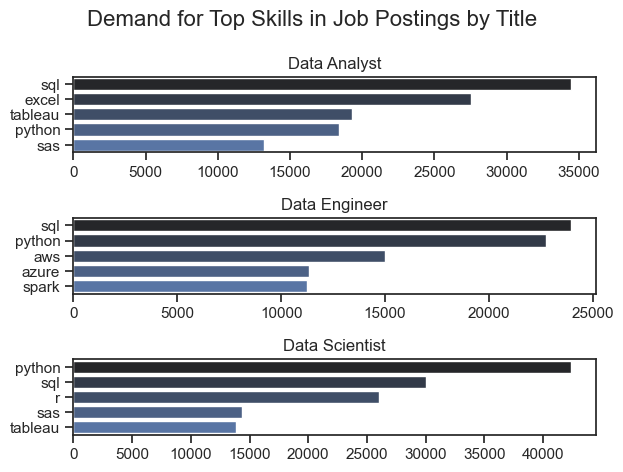

In [20]:
#unique entries of job titles, make a list, sort it, show 3 entries
#use later for number of subplots, filter above skill list by top 3 titles
count=3
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:count])

fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head()
    sns.barplot(data=df_plot, y='job_skills', x='skill_count', ax=ax[i], orient="h", hue='job_skills', palette='dark:b')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(job_title)
fig.suptitle('Demand for Top Skills in Job Postings by Title', fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
df_value=df[df['job_country']=='United States'].copy()
df_value=df_value['job_title_short'].value_counts().reset_index(name='jobs_total')

df_skills_percent=pd.merge(df_skills_count, df_value, how='left', on='job_title_short')
df_skills_percent['skill_percent']=100*df_skills_percent['skill_count']/df_skills_percent['jobs_total']

df_value=df[df['job_country']=='United States'].copy()
df_value=df_value['job_title_short'].value_counts().reset_index(name='jobs_total')

df_skills_percent=pd.merge(df_skills_count, df_value, how='left', on='job_title_short')
df_skills_percent['skill_percent']=100*df_skills_percent['skill_count']/df_skills_percent['jobs_total']
df_skills_percent




,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


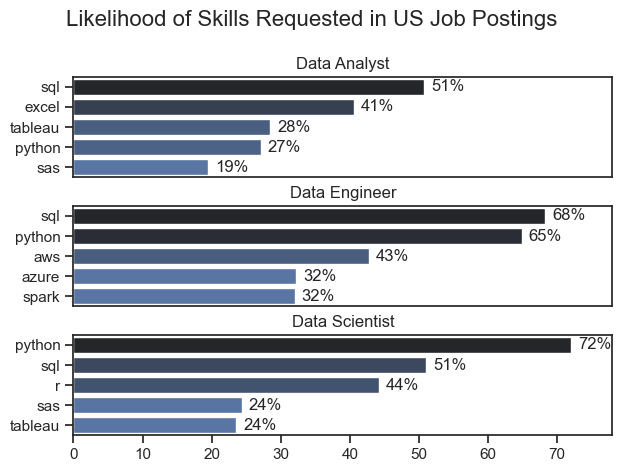

In [16]:
fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate(job_titles):
    df_plot_percent=df_skills_percent[df_skills_percent['job_title_short']==job_title].head()
    sns.barplot(data=df_plot_percent, y='job_skills', x='skill_percent', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,78)
    ax[i].legend().remove()

    for n, v in enumerate (df_plot_percent['skill_percent']):
        ax[i].text(v+1,n,f'{v:.0f}%', va='center')

#remove axis labeling, if not last row per index, set the range as empty
    if i !=len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=16)
fig.tight_layout(h_pad=0.5)
plt.show()